In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import networkx
network = networkx.generators.watts_strogatz_graph(1000, 6, 0.1)
print network.number_of_edges()
#networkx.generators.watts_strogatz_graph
lambdac = 0.166

3000


In [2]:
import random
INFECTED = 1
NOT_INFECTED = 0

# initialization
def initialization(network, d):
    for node in network.nodes():
        network.node[node]['infected'] = NOT_INFECTED
# start with fraction of nodes being infected
    amtInfected = int(d * network.number_of_nodes())
    for i in range(amtInfected):
        x = random.choice(network.nodes())
        network.node[x]['infected'] = INFECTED
    return amtInfected

# tn each time step: determine state transition based on prev state
def update_network(network, p, p2, num_infections):
    for node in network.nodes():
        if network.node[node]['infected'] is INFECTED:
            for n in network.neighbors(node):
                # and infect them w prob p
                if network.node[n]['infected'] is NOT_INFECTED:
                    x = random.random()
                    if x < p:
                    # infect, check by if p is 1.0, it is always true
                        network.node[n]['infected'] = INFECTED
                        num_infections += 1
            y = random.random()
            if y < p2:
                network.node[node]['infected'] = NOT_INFECTED
                num_infections -= 1
    return num_infections


In [3]:
ps = [0.0007, 0.0009, 0.001, 0.002, 0.005]

In [13]:
d = 0.001

p2 = .0001

amtInf = initialization(network, d)
total = []

for j in range(len(ps)):
    networkcopy = network.copy()
    p = ps[j]
    result = []
    num_infections = 1
    for i in range(10000):
        num_infections = update_network(networkcopy, p, p2, num_infections)
        density = float(num_infections) / float(network.number_of_nodes())
        result.append(density)
    total.append(result)
    
len(total)

5

<function matplotlib.pyplot.show>

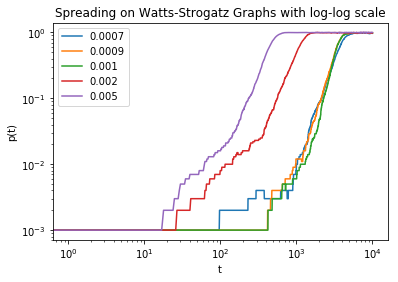

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(len(total)):
    plt.plot(total[i])
plt.yscale('log')
plt.xscale('log')
plt.xlabel('t')
plt.ylabel('p(t)')
plt.title('Spreading on Watts-Strogatz Graphs with log-log scale')
plt.legend(ps)
plt.show

# 

In [15]:
d = 0.01

ps2 = [0.0001, 0.00005, 0.00001, 0.0]
p2 = 0.01

amtInf = initialization(network, d)
secondtotal = []

for j in range(len(ps2)):
    networkcopy = network.copy()
    p = ps2[j]
    result = []
    num_infections = amtInf
    for i in range(1000):
        num_infections = update_network(networkcopy, p, p2, num_infections)
        density = float(num_infections) / float(network.number_of_nodes())
        result.append(density)
    secondtotal.append(result)
    
len(secondtotal)

4

<function matplotlib.pyplot.show>

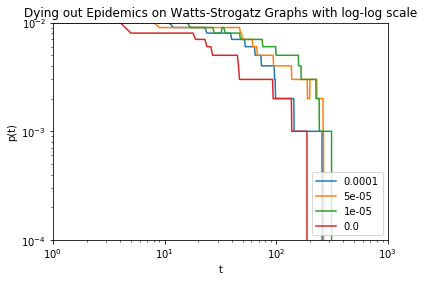

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(len(secondtotal)):
    plt.plot(secondtotal[i])
plt.yscale('log')
plt.xscale('log')
plt.axis([1, 1000, 0.0001, .01])
plt.xlabel('t')
plt.ylabel('p(t)')
plt.title('Dying out Epidemics on Watts-Strogatz Graphs with log-log scale')
plt.legend(ps2)
plt.show

In [17]:
survival = []
for j in range(len(ps)):
    indsurv = []
    result = total[j]
    for i in range(len(result)):
        indsurv.append(1 - result[i])
    survival.append(indsurv)

<function matplotlib.pyplot.show>

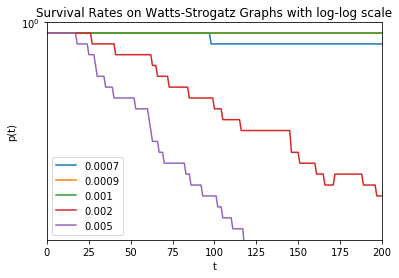

In [25]:
for i in range(len(survival)):
    plt.plot(survival[i])
plt.yscale('log')
plt.axis([0, 200, 0.98, 1])
plt.xlabel('t')
plt.ylabel('p(t)')
plt.legend(ps)
plt.title('Survival Rates on Watts-Strogatz Graphs with log-log scale')
plt.show